In [3]:
import pandas as pd

# Load the file to examine its contents
file_path = 'access.log'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Display the first few lines to understand its structure
lines[:10]


['1.202.218.8 - - [20/Jun/2012:19:05:12 +0200] "GET /robots.txt HTTP/1.0" 404 492 "-" "\\"Mozilla/5.0"\n',
 '208.115.113.91 - - [20/Jun/2012:19:20:16 +0200] "GET /logs/?C=M;O=D HTTP/1.1" 200 1278 "-" "Mozilla/5.0 (compatible; Ezooms/1.0; ezooms.bot@gmail.com)"\n',
 '123.125.71.20 - - [20/Jun/2012:19:30:40 +0200] "GET / HTTP/1.1" 200 912 "-" "Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)"\n',
 '220.181.108.101 - - [20/Jun/2012:19:31:01 +0200] "GET / HTTP/1.1" 200 912 "-" "Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)"\n',
 '123.125.68.79 - - [20/Jun/2012:19:53:24 +0200] "GET / HTTP/1.1" 200 625 "-" "Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)"\n',
 '178.154.210.252 - - [20/Jun/2012:19:54:10 +0200] "GET /?C=S;O=A HTTP/1.1" 200 663 "-" "Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots)"\n',
 '74.125.126.102 - - [20/Jun/2012:20:15:28 +0200] "GET / HTTP/1.1" 200

In [7]:
import pandas as pd
import re

# Define a regex pattern to parse the log lines
pattern = re.compile(r'(\d+\.\d+\.\d+\.\d+) - - \[(.+?)\] "(\w+) (.+?) HTTP/[\d\.]+" (\d+) (\d+) "-" "(.*?)"')

# Extract data from each line
data = []
for line in lines:
    match = pattern.match(line)
    if match:
        data.append(match.groups())

# Create a DataFrame
columns = ['IP', 'Timestamp', 'Method', 'URL', 'Status', 'Bytes', 'User-Agent']
df = pd.DataFrame(data, columns=columns)

# Display the first few rows of the DataFrame
df.head()


,IP,Timestamp,Method,URL,Status,Bytes,User-Agent
0,1.202.218.8,20/Jun/2012:19:05:12 +0200,GET,/robots.txt,404,492,\
1,208.115.113.91,20/Jun/2012:19:20:16 +0200,GET,/logs/?C=M;O=D,200,1278,Mozilla/5.0 (compatible; Ezooms/1.0; ezooms.bo...
2,123.125.71.20,20/Jun/2012:19:30:40 +0200,GET,/,200,912,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...
3,220.181.108.101,20/Jun/2012:19:31:01 +0200,GET,/,200,912,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...
4,123.125.68.79,20/Jun/2012:19:53:24 +0200,GET,/,200,625,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...


In [8]:
# Extract date from timestamp
df['Date'] = pd.to_datetime(df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z').dt.date

# Count unique IPs per day
unique_users_per_day = df.groupby('Date')['IP'].nunique().reset_index()
unique_users_per_day.columns = ['Date', 'Unique Users']

# Display the result
unique_users_per_day

,Date,Unique Users
0,2012-06-20,17
1,2012-06-21,67
2,2012-06-22,66
3,2012-06-23,83
4,2012-06-24,74
5,2012-06-25,69
6,2012-06-26,75
7,2012-06-27,64
8,2012-06-28,79
9,2012-06-29,78


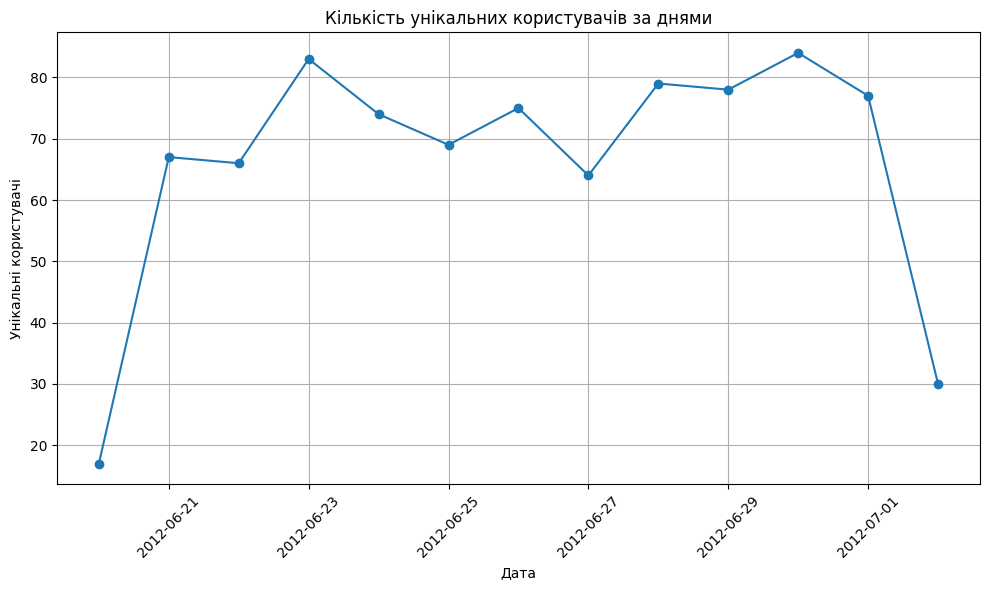

In [9]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(unique_users_per_day['Date'], unique_users_per_day['Unique Users'], marker='o', linestyle='-')
plt.title('Кількість унікальних користувачів за днями')
plt.xlabel('Дата')
plt.ylabel('Унікальні користувачі')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
# Rank users by User-Agent
user_agent_ranking = df.groupby('User-Agent')['IP'].nunique().reset_index()
user_agent_ranking.columns = ['User-Agent', 'Unique Users']
user_agent_ranking = user_agent_ranking.sort_values(by='Unique Users', ascending=False).reset_index(drop=True)

# Display the result
user_agent_ranking.head(10)  # Display the top 10 User-Agents

,User-Agent,Unique Users
0,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,193
1,Mozilla/5.0 (compatible; MJ12bot/v1.4.3; http:...,32
2,Mozilla/5.0 (compatible; AhrefsBot/3.1; +http:...,22
3,Mozilla/5.0 (Windows NT 5.1; rv:6.0.2) Gecko/2...,15
4,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,13
5,Baiduspider+(+http://www.baidu.com/search/spid...,12
6,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,10
7,Baiduspider-image+(+http://www.baidu.com/searc...,5
8,-,4
9,Mozilla/5.0 (Windows; U; Windows NT 5.1; en; r...,3


In [11]:
# Function to extract OS from User-Agent
def extract_os(user_agent):
    os_patterns = [
        (r'Windows NT 10.0', 'Windows 10'),
        (r'Windows NT 6.3', 'Windows 8.1'),
        (r'Windows NT 6.2', 'Windows 8'),
        (r'Windows NT 6.1', 'Windows 7'),
        (r'Windows NT 6.0', 'Windows Vista'),
        (r'Windows NT 5.1', 'Windows XP'),
        (r'Mac OS X', 'Mac OS X'),
        (r'Linux', 'Linux'),
        (r'Android', 'Android'),
        (r'iPhone', 'iOS'),
        (r'iPad', 'iOS'),
        (r'Windows Phone', 'Windows Phone')
    ]
    for pattern, os_name in os_patterns:
        if re.search(pattern, user_agent):
            return os_name
    return 'Other'

df['OS'] = df['User-Agent'].apply(extract_os)

# Rank users by operating system
os_ranking = df.groupby('OS')['IP'].nunique().reset_index()
os_ranking.columns = ['Operating System', 'Unique Users']
os_ranking = os_ranking.sort_values(by='Unique Users', ascending=False).reset_index(drop=True)

# Display the result
os_ranking.head(10)  # Display the top 10 operating systems


,Operating System,Unique Users
0,Other,329
1,Windows XP,31
2,Windows 7,13
3,Linux,4
4,Mac OS X,4
5,Windows Vista,3


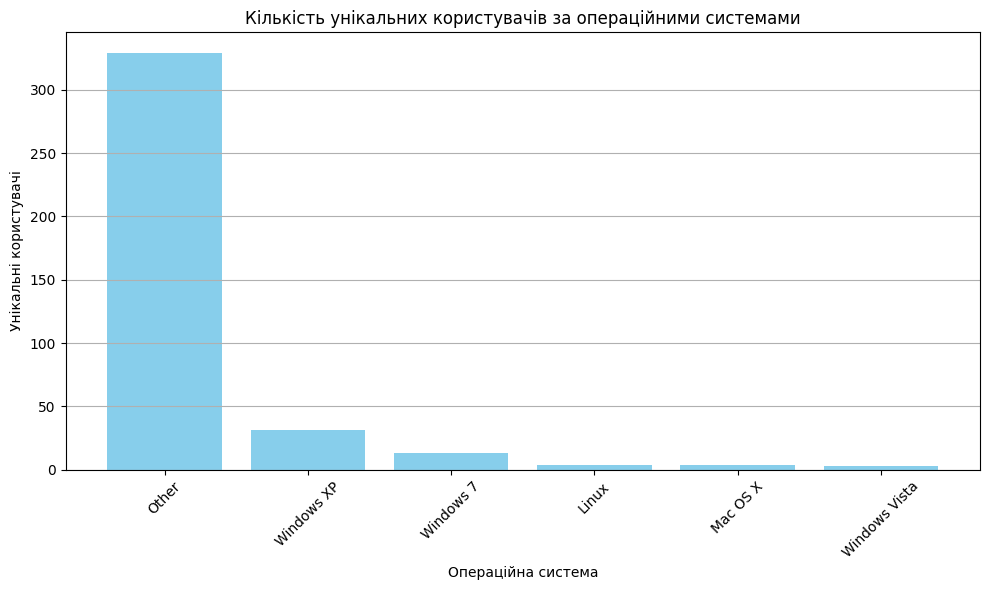

In [12]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(os_ranking['Operating System'], os_ranking['Unique Users'], color='skyblue')
plt.title('Кількість унікальних користувачів за операційними системами')
plt.xlabel('Операційна система')
plt.ylabel('Унікальні користувачі')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()


In [13]:
pip install geoip2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 1.6 MB/s eta 0:00:00


In [20]:
import geoip2.database

# Initialize the GeoIP database
geoip_db_path = 'GeoLite2-Country.mmdb'  # Update this path to your GeoLite2 database file
reader = geoip2.database.Reader(geoip_db_path)

# Function to get country from IP using GeoIP2
def get_country(ip):
    try:
        response = reader.country(ip)
        return response.country.iso_code if response.country.iso_code else 'Unknown'
    except:
        return 'Unknown'

# Add country information to the DataFrame
df['Country'] = df['IP'].apply(get_country)

# Rank users by country
country_ranking = df.groupby('Country')['IP'].nunique().reset_index()
country_ranking.columns = ['Country', 'Unique Users']
country_ranking = country_ranking.sort_values(by='Unique Users', ascending=False).reset_index(drop=True)

# Display the result
print(country_ranking)

KeyError: 'IP'

In [15]:
# Function to identify if a User-Agent is a bot
def is_bot(user_agent):
    bot_keywords = ['bot', 'spider', 'crawl', 'slurp', 'search']
    for keyword in bot_keywords:
        if keyword in user_agent.lower():
            return True
    return False

# Add a column to identify bots
df['IsBot'] = df['User-Agent'].apply(is_bot)

# Separate bots and non-bots
bots_df = df[df['IsBot']]
non_bots_df = df[~df['IsBot']]

# Display the result
print("Bots DataFrame:")
print(bots_df.head())

print("\nNon-Bots DataFrame:")
print(non_bots_df.head())


Bots DataFrame:
                IP                   Timestamp Method             URL Status  \
1   208.115.113.91  20/Jun/2012:19:20:16 +0200    GET  /logs/?C=M;O=D    200   
2    123.125.71.20  20/Jun/2012:19:30:40 +0200    GET               /    200   
3  220.181.108.101  20/Jun/2012:19:31:01 +0200    GET               /    200   
4    123.125.68.79  20/Jun/2012:19:53:24 +0200    GET               /    200   
5  178.154.210.252  20/Jun/2012:19:54:10 +0200    GET       /?C=S;O=A    200   

  Bytes                                         User-Agent        Date     OS  \
1  1278  Mozilla/5.0 (compatible; Ezooms/1.0; ezooms.bo...  2012-06-20  Other   
2   912  Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...  2012-06-20  Other   
3   912  Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...  2012-06-20  Other   
4   625  Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...  2012-06-20  Other   
5   663  Mozilla/5.0 (compatible; YandexBot/3.0; +http:...  2012-06-20  Other   

  Country  IsBot

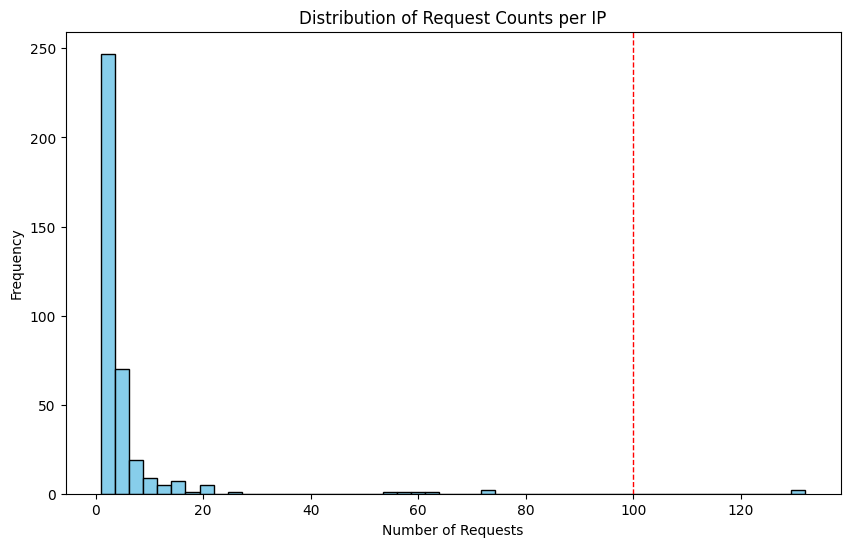

Anomalies detected (IPs with more than 100 requests):
               IP  RequestCount
0  95.108.151.244           132
1     1.202.218.8           130


In [17]:

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z')

# Count the number of requests per IP
ip_request_counts = df['IP'].value_counts().reset_index()
ip_request_counts.columns = ['IP', 'RequestCount']

# Detect anomalies based on a threshold (e.g., more than 100 requests)
threshold = 100
anomalies = ip_request_counts[ip_request_counts['RequestCount'] > threshold]

# Plot the request counts
plt.figure(figsize=(10, 6))
plt.hist(ip_request_counts['RequestCount'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Request Counts per IP')
plt.xlabel('Number of Requests')
plt.ylabel('Frequency')
plt.show()

# Display anomalies
print("Anomalies detected (IPs with more than {} requests):".format(threshold))
print(anomalies)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


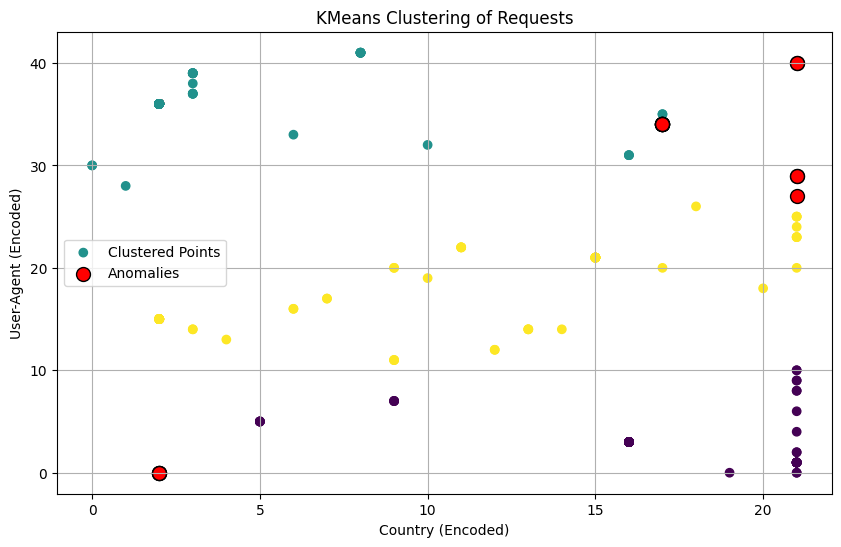

Anomalies detected:
     Country                                         User-Agent  Country_Num  \
175       CN                                                  -            2   
385       CN                                                  -            2   
514       RU              Mozilla/5.0 (compatible; Mail.RU/2.0)           17   
515       RU              Mozilla/5.0 (compatible; Mail.RU/2.0)           17   
740       RU              Mozilla/5.0 (compatible; Mail.RU/2.0)           17   
741       RU              Mozilla/5.0 (compatible; Mail.RU/2.0)           17   
777       US  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...           21   
778       US  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...           21   
852       US  Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US...           21   
942       CN                                                  -            2   
1226      RU              Mozilla/5.0 (compatible; Mail.RU/2.0)           17   
1229      RU        

In [25]:
import pandas as pd
import re
import geoip2.database
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Load the log file
file_path = 'access.log'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Define a regex pattern to parse the log lines
pattern = re.compile(r'(\d+\.\d+\.\d+\.\d+) - - \[(.+?)\] "(\w+) (.+?) HTTP/[\d\.]+" (\d+) (\d+) "-" "(.*?)"')

# Extract data from each line
data = []
for line in lines:
    match = pattern.match(line)
    if match:
        data.append(match.groups())

# Create a DataFrame
columns = ['IP', 'Timestamp', 'Method', 'URL', 'Status', 'Bytes', 'User-Agent']
df = pd.DataFrame(data, columns=columns)

# Initialize the GeoIP database
geoip_db_path = 'GeoLite2-Country.mmdb'  # Update this path to your GeoLite2 database file
reader = geoip2.database.Reader(geoip_db_path)

# Function to get country from IP using GeoIP2
def get_country(ip):
    try:
        response = reader.country(ip)
        return response.country.iso_code if response.country.iso_code else 'Unknown'
    except:
        return 'Unknown'

# Add country information to the DataFrame
df['Country'] = df['IP'].apply(get_country)

# Function to identify if a User-Agent is a bot
def is_bot(user_agent):
    bot_keywords = ['bot', 'spider', 'crawl', 'slurp', 'search']
    for keyword in bot_keywords:
        if keyword in user_agent.lower():
            return True
    return False

# Add a column to identify bots
df['IsBot'] = df['User-Agent'].apply(is_bot)

# Filter out bot entries
df = df[~df['IsBot']]

# Extract relevant columns
df = df[['Country', 'User-Agent']]

# Encode categorical data
label_encoder_country = LabelEncoder()
label_encoder_ua = LabelEncoder()
df['Country_Num'] = label_encoder_country.fit_transform(df['Country'])
df['User-Agent_Num'] = label_encoder_ua.fit_transform(df['User-Agent'])

# Prepare data for clustering
X = df[['Country_Num', 'User-Agent_Num']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

# Calculate distance to cluster center
df['DistanceToCenter'] = np.linalg.norm(X - kmeans.cluster_centers_[df['Cluster']], axis=1)

# Define anomaly threshold (e.g., points with distance greater than 95th percentile)
threshold = np.percentile(df['DistanceToCenter'], 95)
anomalies = df[df['DistanceToCenter'] > threshold]

# Plot the clusters and anomalies
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df['Country_Num'], df['User-Agent_Num'], c=df['Cluster'], cmap='viridis', label='Clustered Points')

# Highlight anomalies
plt.scatter(anomalies['Country_Num'], anomalies['User-Agent_Num'], color='red', edgecolor='k', s=100, label='Anomalies')

# Add titles and labels
plt.title('KMeans Clustering of Requests')
plt.xlabel('Country (Encoded)')
plt.ylabel('User-Agent (Encoded)')
plt.legend()
plt.grid(True)
plt.show()

# Display anomalies
print("Anomalies detected:")
print(anomalies)
